Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 8
  - _**[Gradient Boosting Explained](https://www.gormanalysis.com/blog/gradient-boosting-explained/)**_ — Ben Gorman
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html) — Alex Rogozhnikov
  - [How to explain gradient boosting](https://explained.ai/gradient-boosting/) — Terence Parr & Jeremy Howard

In [3]:
from google.colab import files
import pandas as pd
uploaded = files.upload()

Saving datasets_311_673_survey.csv to datasets_311_673_survey.csv


In [5]:
import pandas as pd

df= pd.read_csv('/content/datasets_311_673_survey.csv')

In [6]:
df['self_employed'].fillna('No', inplace=True)

In [8]:
df['comments'].fillna('No', inplace=True)

In [9]:
df['work_interfere'].fillna('Unknown', inplace=True)

In [10]:
df['state'].fillna('Unknown', inplace=True)

In [11]:
df['work_interfere'] = df['work_interfere'].apply({'Unknown':'No', 'Never':'No', 'Sometimes':'Yes', 'Rarely':'Yes', 'Often':'Yes'}.get)

In [12]:
df['Gender'] = df['Gender'].apply({'male':'Male', 'M':'Male', 'm':'Male', 'Make':'Male', 'Male':'Male','female':'Female', 'Female':'Female', 'F':'Female', 'f':'Female'}.get)

In [13]:
df = df.drop(['Timestamp'], axis=1)

In [14]:
df['comments'] = df['comments'].apply(lambda x: 'No' if x == 'No' else 'Yes')

In [15]:
df.dropna(inplace=True)

In [16]:
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,37,Female,United States,IL,No,No,Yes,Yes,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,No
1,44,Male,United States,IN,No,No,No,Yes,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,No
2,32,Male,Canada,Unknown,No,No,No,Yes,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,No
3,31,Male,United Kingdom,Unknown,No,Yes,Yes,Yes,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,No
4,31,Male,United States,TX,No,No,No,No,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,No


In [17]:
def wrangle(df, thresh=1200):
  df = df.copy()

  y = df['work_interfere']
  df.drop(['work_interfere'], axis=1, inplace=True)

  return df, y

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split

In [19]:
# Wrangling
X, y = wrangle(df)

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.30, random_state=42)

# Baseline
y_train.value_counts(normalize=True)

Yes    0.617473
No     0.382527
Name: work_interfere, dtype: float64

In [20]:
!pip install category_encoders

     |████████████████████████████████| 81kB 2.2MB/s 


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
model = Pipeline([
                  ('ohe', OneHotEncoder()),
                  ('impute', SimpleImputer()),
                  ('classifier', RandomForestClassifier())
                  #(SelectKBest(f_regression, k=20))

])

In [23]:
%%time
model.fit(X_train, y_train)

print('training accuracy:', model.score(X_train, y_train))
print('validation accuracy:', model.score(X_test, y_test))

training accuracy: 1.0
validation accuracy: 0.8269230769230769
CPU times: user 773 ms, sys: 20.5 ms, total: 793 ms
Wall time: 793 ms


In [24]:
from sklearn.ensemble import RandomForestRegressor
import category_encoders as ce
import numpy as np
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor


In [26]:
y_val = y_test
X_val = X_test

In [27]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8214285714285714


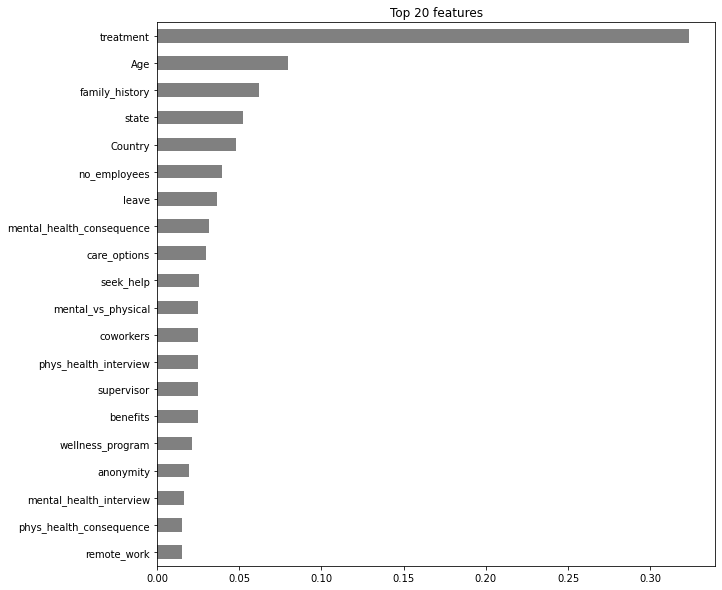

In [28]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [29]:
column  = 'treatment'

# Fit without column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train.drop(columns=column), y_train)
score_without = pipeline.score(X_val.drop(columns=column), y_val)
print(f'Validation Accuracy without {column}: {score_without}')

# Fit with column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_val, y_val)
print(f'Validation Accuracy with {column}: {score_with}')

# Compare the error with & without column
print(f'Drop-Column Importance for {column}: {score_with - score_without}')

Validation Accuracy without treatment: 0.7060439560439561
Validation Accuracy with treatment: 0.8214285714285714
Drop-Column Importance for treatment: 0.11538461538461531


In [30]:
# Ignore warnings
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [31]:
!pip install eli5

     |████████████████████████████████| 112kB 2.8MB/s 


In [32]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [41]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_val.columns.tolist()
)

Weight,Feature
0.2500 ± 0.0248,treatment
0.0192 ± 0.0098,family_history
0.0066 ± 0.0096,state
0.0055 ± 0.0092,no_employees
0.0033 ± 0.0088,phys_health_interview
0.0033 ± 0.0064,mental_health_consequence
0.0027 ± 0.0060,wellness_program
0.0022 ± 0.0073,coworkers
0.0011 ± 0.0027,benefits
0.0000 ± 0.0070,comments


In [34]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    #SimpleImputer(strategy='median'), 
    GradientBoostingClassifier()
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Gender', 'Country', 'state',
                                      'self_employed', 'family_history',
                                      'treatment', 'no_employees',
                                      'remote_work', 'tech_company', 'benefits',
                                      'care_options', 'wellness_program',
                                      'seek_help', 'anonymity', 'leave',
                                      'mental_health_consequence',
                                      'phys_health_consequence', 'coworkers',
                                      'supervisor', 'mental_hea...
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
   

In [35]:
print('Training Accuracy:', pipeline.score(X_train, y_train))
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Training Accuracy: 0.8949232585596222
Validation Accuracy: 0.8159340659340659


In [36]:
from xgboost import XGBClassifier

In [37]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=6)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Gender', 'Country', 'state',
                                      'self_employed', 'family_history',
                                      'treatment', 'no_employees',
                                      'remote_work', 'tech_company', 'benefits',
                                      'care_options', 'wellness_program',
                                      'seek_help', 'anonymity', 'leave',
                                      'mental_health_consequence',
                                      'phys_health_consequence', 'coworkers',
                                      'supervisor', 'mental_hea...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                 

In [38]:
print('Training Accuracy:', pipeline.score(X_train, y_train))
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Training Accuracy: 0.8819362455726092
Validation Accuracy: 0.8241758241758241


In [39]:
('ohe', OneHotEncoder()),

(('ohe', OneHotEncoder(cols=None, drop_invariant=False, handle_missing='value',
                handle_unknown='value', return_df=True, use_cat_names=False,
                verbose=0)),)

In [40]:
encoder = ce.OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

model = XGBClassifier(
    n_estimators = 1000,
    max_depth=7,
    learning_rate=0.5,
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train, 
          eval_set=eval_set, 
          eval_metric='merror', 
          early_stopping_rounds=50) # Stop if the score hasn't improved in 50 rounds

XGBoostError: ignored

In [ ]:
X_train.head(1)

In [ ]:
!pip install pdpbox

In [47]:
# Use Ordinal Encoder, outside of a pipeline
encoder = ce.OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=4)
model.fit(X_encoded, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [42]:
df.head(1)

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,37,Female,United States,IL,No,No,Yes,Yes,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,No


In [43]:
target = 'work_interfere'
features = df.columns.drop(['work_interfere'])

X = df[features]
y = df[target]

In [45]:
!pip install pdpbox

     |████████████████████████████████| 57.7MB 69kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690722 sha256=2b36f49fe7c9080b932d7e71bc76f026531e2a47562dc86ac6b54521d6b553a4
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox
